In [12]:
from hmmlearn.hmm import GaussianHMM
import edward as ed
import pandas as pd


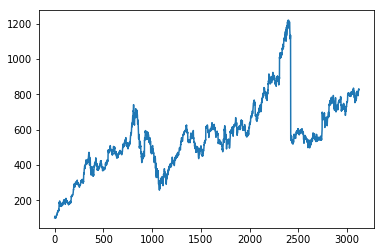

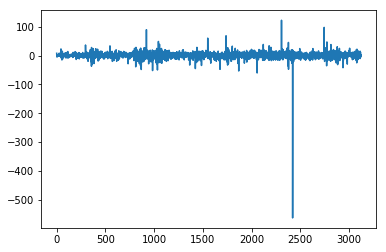

In [28]:
data = pd.read_csv('/Users/ishan/Downloads/probprog-finalproject-master-2/notebook-example/data/Google.csv')
data = data['Close']
data = data.as_matrix()
plt.plot(data)
plt.show()

diff = np.diff(data)
data = np.column_stack(diff)
data = np.transpose(data)
plt.plot(diff)
plt.show()

In [30]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
print(data.shape[0])
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000).fit(data)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(data)

print("done")

fitting to HMM and decoding ...3124


/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/.local/lib/python3.6/site-packages/hmmle

done


/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/ishan/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: De

In [31]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

#fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
#colours = cm.rainbow(np.linspace(0, 1, model.n_components))
#for i, (ax, colour) in enumerate(zip(axs, colours)):
#    # Use fancy indexing to plot data in each state.
#    mask = hidden_states == i
#    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
#    ax.set_title("{0}th hidden state".format(i))
#
#    # Format the ticks.
#    ax.xaxis.set_major_locator(YearLocator())
#    ax.xaxis.set_minor_locator(MonthLocator())
#
#    ax.grid(True)

#plt.show()

Transition matrix
[[  9.69873693e-001   3.01263067e-002   3.80110961e-014]
 [  1.68918051e-001   8.28965254e-001   2.11669537e-003]
 [  2.09039277e-157   1.00000000e+000   0.00000000e+000]]

Means and vars of each hidden state
0th hidden state
mean =  [ 0.65161736]
var =  [ 47.65255108]

1th hidden state
mean =  [-0.92427552]
var =  [ 378.66122658]

2th hidden state
mean =  [-563.6]
var =  [ 0.01]

